In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# irgend eine config 
%matplotlib inline

# SVG-View
%config InlineBackend.figure_formats=['svg']

# Dataset
pokemon_dataset = pd.read_csv('../data/pokedex_420.csv')

pkmn_global = pokemon_dataset.drop(['Unnamed: 0', 'name', 'japanese_name', 'catch_rate', 'base_experience',
                                    'base_friendship', 'growth_rate', 'egg_cycles', 'egg_type_1', 'egg_type_2',
                                    'egg_type_number', 'percentage_male'], axis=1)

df = pkmn_global[pkmn_global['generation'] <= 3].copy() 
df = df[~df.duplicated(keep="last", subset='german_name')]
legendary = df[df['german_name'] == 'Mewtu']
legendary

,pokedex_number,german_name,generation,is_sub_legendary,is_legendary,is_mythical,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
190,150,Mewtu,1,0,1,0,Genetic Pokémon,1,Psychic,NaN,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0


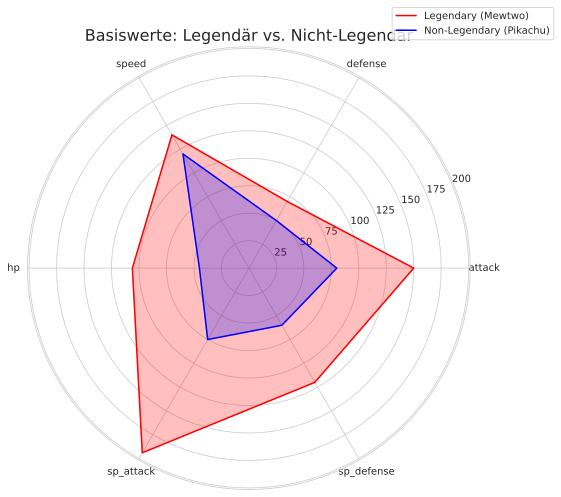

In [49]:
import numpy as np
import matplotlib.pyplot as plt


legendary = df[(df['german_name'] == 'Mewtu') & (df['is_legendary'] == True)]
non_legendary = df[(df['german_name'] == 'Pikachu') & (df['is_legendary'] == False)]

# wo sind meine Daten
if legendary.empty or non_legendary.empty:
    print("Fehler: Keine passenden Daten für legendäre oder nicht-legendäre Pokémon gefunden.")
else:
    stats = ['attack', 'defense', 'speed', 'hp', 'sp_attack', 'sp_defense']
    legendary_values = legendary[stats].values[0]
    non_legendary_values = non_legendary[stats].values[0]

    labels = stats
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

    legendary_values = np.append(legendary_values, legendary_values[0])
    non_legendary_values = np.append(non_legendary_values, non_legendary_values[0])
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.plot(angles, legendary_values, label='Legendary (Mewtwo)', color='red')
    ax.fill(angles, legendary_values, alpha=0.25, color='red')
    ax.plot(angles, non_legendary_values, label='Non-Legendary (Pikachu)', color='blue')
    ax.fill(angles, non_legendary_values, alpha=0.25, color='blue')

    ax.set_title('Basiswerte: Legendär vs. Nicht-Legendär', fontsize=16)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()